# K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [163]:
from __future__ import print_function

import os

data_path = ['..', '..', 'data']


In [164]:
print(data_path)

['..', '..', 'data']


## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [165]:
import pandas as pd
orig_dataset = pd.read_csv("Orange_Telecom_Churn_Data.csv")
# new_ds = pd.read_csv("Orange_Telecom_Churn_Data.csv",usecols=[0,1,2,3,5])

In [166]:
orig_dataset.head(5)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [167]:
columns_to_drop = ["state","area_code","phone_number"]
new_data = orig_dataset.drop(columns_to_drop, axis=1)

In [168]:
new_data.head(5)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [169]:
from sklearn import preprocessing

# dataset = ["masaka","mbale","mbale","masaka","Gulu","Kampala"]

encoder = preprocessing.LabelEncoder()
labels_to_encode = ['churned','voice_mail_plan','intl_plan']

new_data["churned"] = LabelEncoder().fit_transform(new_data["churned"])
new_data["voice_mail_plan"] = LabelEncoder().fit_transform(new_data["voice_mail_plan"])
new_data["intl_plan"] = LabelEncoder().fit_transform(new_data["intl_plan"])

new_data.tail(6)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
4994,75,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4995,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,86,0,1,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [170]:
#scaling the dataset

dict = { 
    'score':[12,3,43,43,12,]
}
myscores = pd.DataFrame(dict, columns = ['score'])
myscores


def myscaler(dataframe):
    std_scaler = preprocessing.MinMaxScaler()
    scaled_scores = std_scaler.fit_transform(dataframe)
    return scaled_scores

scaled_dataset = myscaler(new_data)
scaled_dataset1 = pd.DataFrame(scaled_dataset, columns = new_data.columns)
# scaled_dataset1

/home/akera/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


x_data = scaled_dataset1[scaled_dataset1.columns[:-1]]
y_data = scaled_dataset1[scaled_dataset1.columns[-1]]

# len(y_data)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.40, random_state=23)

# len(X_train)

In [214]:
## fitting the classifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [215]:
predictions = knn.predict(X_test)


In [216]:
pred_df = pd.DataFrame(predictions,columns = ['pred'])
y_test

comparison_df = pd.DataFrame(pred_df,y_test)
comparison_df.head(1)

,pred
churned,
0.0,0.0


In [217]:
### Evaluation
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))

[[1709   14]
 [ 177  100]]


In [218]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1723
         1.0       0.88      0.36      0.51       277

   micro avg       0.90      0.90      0.90      2000
   macro avg       0.89      0.68      0.73      2000
weighted avg       0.90      0.90      0.89      2000



In [219]:
### Finding K
import numpy as np
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

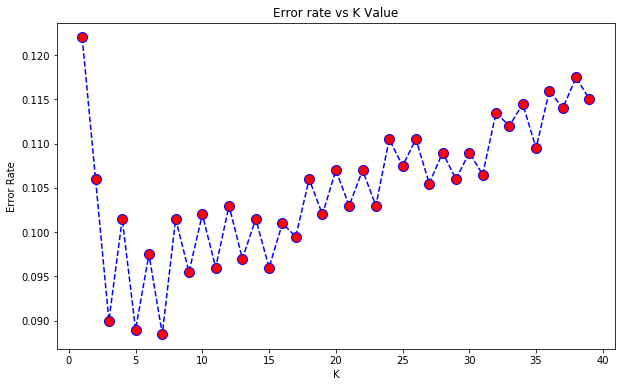

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))

plt.plot(range(1,40), error, color='blue', 
         linestyle='dashed', marker = 'o', markerfacecolor='red',
        markersize=10)

plt.title("Error rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.